In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.drop(["Id"], axis=1,inplace=True)

df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

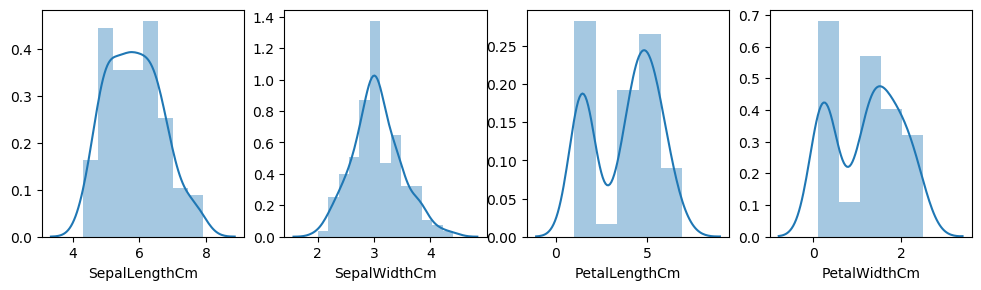

In [8]:
col=list(df.drop(["Species"], axis=1).columns)
plt.figure(figsize=(12,3), dpi=100)

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.distplot(df[col[i]]);

In [10]:
# sepalWidthCm column looks like normal distribution, but to make sure we should test it by using jarque bera test

from scipy import stats

result=stats.jarque_bera(df.SepalWidthCm)
result

# According to the result, p value is not less than 0.05, so we reject to H1 hypothesis. So we accept H0, SepalWidthCm column has not normal distribution.

(3.098451677011039, 0.212412351654644)

In [11]:
# After normalization, we shall try to understand whether still have normal distribution

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [12]:
df["normalized_sepalLengthcm"]=normalize(np.array(df["SepalLengthCm"]).reshape(1,-1)).reshape(-1,1)
df["normalized_sepalWidthcm"]=normalize(np.array(df["SepalLengthCm"]).reshape(1,-1)).reshape(-1,1)
df["normalized_petalLengthcm"]=normalize(np.array(df["PetalLengthCm"]).reshape(1,-1)).reshape(-1,1)
df["normalized_petalWidthcm"]=normalize(np.array(df["PetalWidthCm"]).reshape(1,-1)).reshape(-1,1)

df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,normalized_sepalLengthcm,normalized_sepalWidthcm,normalized_petalLengthcm,normalized_petalWidthcm
0,5.1,3.5,1.4,0.2,Iris-setosa,0.070563,0.070563,0.027546,0.011503
1,4.9,3.0,1.4,0.2,Iris-setosa,0.067795,0.067795,0.027546,0.011503
2,4.7,3.2,1.3,0.2,Iris-setosa,0.065028,0.065028,0.025579,0.011503


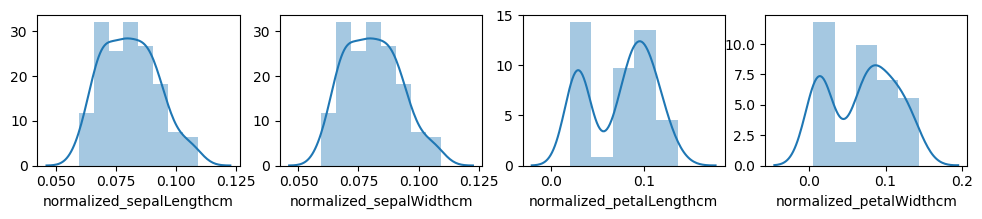

In [14]:
norm_dist=list(df.iloc[:,5:9].columns)

standard_scaler=StandardScaler().fit_transform(df.iloc[:,5:9])

plt.figure(figsize=(12,2), dpi=100)
for k in range(len(norm_dist)):
    plt.subplot(1,4,k+1)
    sns.distplot(df[norm_dist[k]]);

In [57]:
pd.DataFrame(result_norm)

,0
0,4.485875
1,0.106146


In [63]:
# After normalization, we shall test it by using jarque bera

norm_col=list(df.iloc[:,5:9].columns)
#df_1=pd.DataFrame(columns=["sepalLengthcm", "sepalWidthcm", "petallengthcm", "petalwidthcm"], index=["statistic","p_value"])

for h in range(len(norm_col)):
    result_norm=stats.jarque_bera(df[norm_col[h]])
    dff = pd.DataFrame(result_norm)
dff
    

,0
0,11.413113
1,0.003324


In [70]:
# Now let's convert from categorical variable to numerical variable, for this we'll use LabelEncoder which is one of the one hot encoding methods

from sklearn.preprocessing import LabelEncoder
df["encoded_species"]=LabelEncoder().fit_transform(df["Species"])


df.drop("Species", axis=1, inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,normalized_sepalLengthcm,normalized_sepalWidthcm,normalized_petalLengthcm,normalized_petalWidthcm,encoded_species
0,5.1,3.5,1.4,0.2,0.070563,0.070563,0.027546,0.011503,0
1,4.9,3.0,1.4,0.2,0.067795,0.067795,0.027546,0.011503,0
2,4.7,3.2,1.3,0.2,0.065028,0.065028,0.025579,0.011503,0


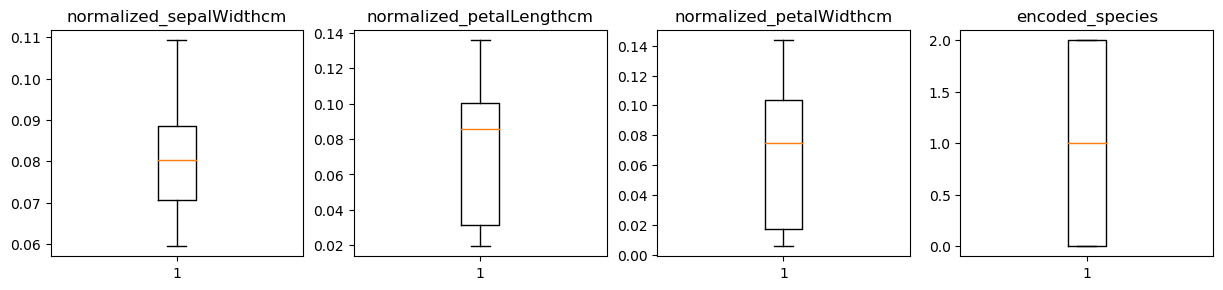

In [76]:
norm_col=list(df.iloc[:,5:9].columns)

plt.figure(figsize=(15,3), dpi=100)
for k in range(len(norm_col)):
    plt.subplot(1,4,k+1)
    plt.title(norm_col[k])
    plt.boxplot(df[norm_col[k]]);

### It's time to apply machine learning algorithm

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [80]:
X=df.iloc[:,5:9]
Y=df.encoded_species

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

print("Shape of the X_train:", X_train.shape)
print("Shape of the Y_train:", Y_train.shape)
print("Shape of the X_test:", X_test.shape)
print("Shape of the Y_test:", Y_test.shape)

Shape of the X_train: (105, 4)
Shape of the Y_train: (105,)
Shape of the X_test: (45, 4)
Shape of the Y_test: (45,)


In [92]:
log=LogisticRegression()

log.fit(X_train,Y_train)
y_pred=log.predict(X_test)

print("Classification report:", classification_report(Y_test,y_pred),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test, y_pred),"\n")
print("Accuracy score:", accuracy_score(Y_test,y_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 

Confusion matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 

Accuracy score: 1.0


C:\Users\afran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\afran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
